In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants 
path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 14
idxLength = 28
idxGain = 29

In [3]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

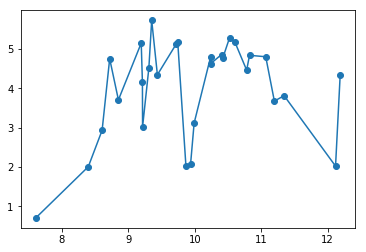

Optimal lenght:  3.390385666666667


In [10]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)

In [11]:
gain = gain[1:]
print(np.average(gain))
print(gain)

9.968929310344828
[ 7.60681   8.396915  8.605145  8.71898   8.850466  9.193934  9.211818
  9.214128  9.308934  9.351405  9.437198  9.717499  9.742959  9.866893
  9.93671   9.990246 10.23705  10.23994  10.40229  10.42038  10.52346
 10.6031   10.78073  10.82421  11.06804  11.19816  11.3444   12.11882
 12.18833 ]
